In [2]:
import os
import cv2
import onnx
import time
from onnxsim import simplify

import torch
from utils.tool import *
from module.detector import Detector

# Path langsung ke file-file yang diperlukan
yaml_path = "configs\\tooth.yaml"  # Ganti dengan path ke file YAML
weight_path = "deploy\Yolov8\weights\\best.pt"  # Ganti dengan path ke file weight
img_path = "tes karies.jpg"  # Ganti dengan path ke gambar test
threshold = 0.3

# Parsing argumen dihilangkan karena udah ada path langsung

#run on cpu
device = torch.device("cpu")

# Benerin load YAML konfigurasi
cfg = LoadYaml(yaml_path)
print(cfg)

# Model loading
print("load weight from:%s" % weight_path)
model = Detector(cfg.category_num, True).to(device)
model.load_state_dict(torch.load(weight_path, map_location=device))
model.eval()

# Data preprocessing
ori_img = cv2.imread(img_path)
res_img = cv2.resize(ori_img, (cfg.input_width, cfg.input_height), interpolation=cv2.INTER_LINEAR)
img = res_img.reshape(1, cfg.input_height, cfg.input_width, 3)
img = torch.from_numpy(img.transpose(0, 3, 1, 2))
img = img.to(device).float() / 255.0

start = time.perf_counter()
preds = model(img)
end = time.perf_counter()
time = (end - start) * 1000.
print("forward time:%fms" % time)

# Post-processing fitur gambar
output = handle_preds(preds, device, threshold) #thres

LABEL_NAMES = []
with open(cfg.names, 'r') as f:
    for line in f.readlines():
        LABEL_NAMES.append(line.strip())

H, W, _ = ori_img.shape
scale_h, scale_w = H / cfg.input_height, W / cfg.input_width

for box in output[0]:
    print(box)
    box = box.tolist()

    obj_score = box[4]
    category = LABEL_NAMES[int(box[5])]

    x1, y1 = int(box[0] * W), int(box[1] * H)
    x2, y2 = int(box[2] * W), int(box[3] * H)

    cv2.rectangle(ori_img, (x1, y1), (x2, y2), (255, 255, 0), 2)
    cv2.putText(ori_img, '%.2f' % obj_score, (x1, y1 - 5), 0, 0.7, (0, 255, 0), 2)
    cv2.putText(ori_img, category, (x1, y1 - 25), 0, 0.7, (0, 255, 0), 2)

cv2.imwrite("tes karies result.png", ori_img)


Load yaml sucess...
load weight from:deploy\Yolov8\weights\best.pt
load param...


RuntimeError: Error(s) in loading state_dict for Detector:
	Missing key(s) in state_dict: "backbone.first_conv.0.weight", "backbone.first_conv.1.weight", "backbone.first_conv.1.bias", "backbone.first_conv.1.running_mean", "backbone.first_conv.1.running_var", "backbone.stage2.0.branch_main.0.weight", "backbone.stage2.0.branch_main.1.weight", "backbone.stage2.0.branch_main.1.bias", "backbone.stage2.0.branch_main.1.running_mean", "backbone.stage2.0.branch_main.1.running_var", "backbone.stage2.0.branch_main.3.weight", "backbone.stage2.0.branch_main.4.weight", "backbone.stage2.0.branch_main.4.bias", "backbone.stage2.0.branch_main.4.running_mean", "backbone.stage2.0.branch_main.4.running_var", "backbone.stage2.0.branch_main.5.weight", "backbone.stage2.0.branch_main.6.weight", "backbone.stage2.0.branch_main.6.bias", "backbone.stage2.0.branch_main.6.running_mean", "backbone.stage2.0.branch_main.6.running_var", "backbone.stage2.0.branch_proj.0.weight", "backbone.stage2.0.branch_proj.1.weight", "backbone.stage2.0.branch_proj.1.bias", "backbone.stage2.0.branch_proj.1.running_mean", "backbone.stage2.0.branch_proj.1.running_var", "backbone.stage2.0.branch_proj.2.weight", "backbone.stage2.0.branch_proj.3.weight", "backbone.stage2.0.branch_proj.3.bias", "backbone.stage2.0.branch_proj.3.running_mean", "backbone.stage2.0.branch_proj.3.running_var", "backbone.stage2.1.branch_main.0.weight", "backbone.stage2.1.branch_main.1.weight", "backbone.stage2.1.branch_main.1.bias", "backbone.stage2.1.branch_main.1.running_mean", "backbone.stage2.1.branch_main.1.running_var", "backbone.stage2.1.branch_main.3.weight", "backbone.stage2.1.branch_main.4.weight", "backbone.stage2.1.branch_main.4.bias", "backbone.stage2.1.branch_main.4.running_mean", "backbone.stage2.1.branch_main.4.running_var", "backbone.stage2.1.branch_main.5.weight", "backbone.stage2.1.branch_main.6.weight", "backbone.stage2.1.branch_main.6.bias", "backbone.stage2.1.branch_main.6.running_mean", "backbone.stage2.1.branch_main.6.running_var", "backbone.stage2.2.branch_main.0.weight", "backbone.stage2.2.branch_main.1.weight", "backbone.stage2.2.branch_main.1.bias", "backbone.stage2.2.branch_main.1.running_mean", "backbone.stage2.2.branch_main.1.running_var", "backbone.stage2.2.branch_main.3.weight", "backbone.stage2.2.branch_main.4.weight", "backbone.stage2.2.branch_main.4.bias", "backbone.stage2.2.branch_main.4.running_mean", "backbone.stage2.2.branch_main.4.running_var", "backbone.stage2.2.branch_main.5.weight", "backbone.stage2.2.branch_main.6.weight", "backbone.stage2.2.branch_main.6.bias", "backbone.stage2.2.branch_main.6.running_mean", "backbone.stage2.2.branch_main.6.running_var", "backbone.stage2.3.branch_main.0.weight", "backbone.stage2.3.branch_main.1.weight", "backbone.stage2.3.branch_main.1.bias", "backbone.stage2.3.branch_main.1.running_mean", "backbone.stage2.3.branch_main.1.running_var", "backbone.stage2.3.branch_main.3.weight", "backbone.stage2.3.branch_main.4.weight", "backbone.stage2.3.branch_main.4.bias", "backbone.stage2.3.branch_main.4.running_mean", "backbone.stage2.3.branch_main.4.running_var", "backbone.stage2.3.branch_main.5.weight", "backbone.stage2.3.branch_main.6.weight", "backbone.stage2.3.branch_main.6.bias", "backbone.stage2.3.branch_main.6.running_mean", "backbone.stage2.3.branch_main.6.running_var", "backbone.stage3.0.branch_main.0.weight", "backbone.stage3.0.branch_main.1.weight", "backbone.stage3.0.branch_main.1.bias", "backbone.stage3.0.branch_main.1.running_mean", "backbone.stage3.0.branch_main.1.running_var", "backbone.stage3.0.branch_main.3.weight", "backbone.stage3.0.branch_main.4.weight", "backbone.stage3.0.branch_main.4.bias", "backbone.stage3.0.branch_main.4.running_mean", "backbone.stage3.0.branch_main.4.running_var", "backbone.stage3.0.branch_main.5.weight", "backbone.stage3.0.branch_main.6.weight", "backbone.stage3.0.branch_main.6.bias", "backbone.stage3.0.branch_main.6.running_mean", "backbone.stage3.0.branch_main.6.running_var", "backbone.stage3.0.branch_proj.0.weight", "backbone.stage3.0.branch_proj.1.weight", "backbone.stage3.0.branch_proj.1.bias", "backbone.stage3.0.branch_proj.1.running_mean", "backbone.stage3.0.branch_proj.1.running_var", "backbone.stage3.0.branch_proj.2.weight", "backbone.stage3.0.branch_proj.3.weight", "backbone.stage3.0.branch_proj.3.bias", "backbone.stage3.0.branch_proj.3.running_mean", "backbone.stage3.0.branch_proj.3.running_var", "backbone.stage3.1.branch_main.0.weight", "backbone.stage3.1.branch_main.1.weight", "backbone.stage3.1.branch_main.1.bias", "backbone.stage3.1.branch_main.1.running_mean", "backbone.stage3.1.branch_main.1.running_var", "backbone.stage3.1.branch_main.3.weight", "backbone.stage3.1.branch_main.4.weight", "backbone.stage3.1.branch_main.4.bias", "backbone.stage3.1.branch_main.4.running_mean", "backbone.stage3.1.branch_main.4.running_var", "backbone.stage3.1.branch_main.5.weight", "backbone.stage3.1.branch_main.6.weight", "backbone.stage3.1.branch_main.6.bias", "backbone.stage3.1.branch_main.6.running_mean", "backbone.stage3.1.branch_main.6.running_var", "backbone.stage3.2.branch_main.0.weight", "backbone.stage3.2.branch_main.1.weight", "backbone.stage3.2.branch_main.1.bias", "backbone.stage3.2.branch_main.1.running_mean", "backbone.stage3.2.branch_main.1.running_var", "backbone.stage3.2.branch_main.3.weight", "backbone.stage3.2.branch_main.4.weight", "backbone.stage3.2.branch_main.4.bias", "backbone.stage3.2.branch_main.4.running_mean", "backbone.stage3.2.branch_main.4.running_var", "backbone.stage3.2.branch_main.5.weight", "backbone.stage3.2.branch_main.6.weight", "backbone.stage3.2.branch_main.6.bias", "backbone.stage3.2.branch_main.6.running_mean", "backbone.stage3.2.branch_main.6.running_var", "backbone.stage3.3.branch_main.0.weight", "backbone.stage3.3.branch_main.1.weight", "backbone.stage3.3.branch_main.1.bias", "backbone.stage3.3.branch_main.1.running_mean", "backbone.stage3.3.branch_main.1.running_var", "backbone.stage3.3.branch_main.3.weight", "backbone.stage3.3.branch_main.4.weight", "backbone.stage3.3.branch_main.4.bias", "backbone.stage3.3.branch_main.4.running_mean", "backbone.stage3.3.branch_main.4.running_var", "backbone.stage3.3.branch_main.5.weight", "backbone.stage3.3.branch_main.6.weight", "backbone.stage3.3.branch_main.6.bias", "backbone.stage3.3.branch_main.6.running_mean", "backbone.stage3.3.branch_main.6.running_var", "backbone.stage3.4.branch_main.0.weight", "backbone.stage3.4.branch_main.1.weight", "backbone.stage3.4.branch_main.1.bias", "backbone.stage3.4.branch_main.1.running_mean", "backbone.stage3.4.branch_main.1.running_var", "backbone.stage3.4.branch_main.3.weight", "backbone.stage3.4.branch_main.4.weight", "backbone.stage3.4.branch_main.4.bias", "backbone.stage3.4.branch_main.4.running_mean", "backbone.stage3.4.branch_main.4.running_var", "backbone.stage3.4.branch_main.5.weight", "backbone.stage3.4.branch_main.6.weight", "backbone.stage3.4.branch_main.6.bias", "backbone.stage3.4.branch_main.6.running_mean", "backbone.stage3.4.branch_main.6.running_var", "backbone.stage3.5.branch_main.0.weight", "backbone.stage3.5.branch_main.1.weight", "backbone.stage3.5.branch_main.1.bias", "backbone.stage3.5.branch_main.1.running_mean", "backbone.stage3.5.branch_main.1.running_var", "backbone.stage3.5.branch_main.3.weight", "backbone.stage3.5.branch_main.4.weight", "backbone.stage3.5.branch_main.4.bias", "backbone.stage3.5.branch_main.4.running_mean", "backbone.stage3.5.branch_main.4.running_var", "backbone.stage3.5.branch_main.5.weight", "backbone.stage3.5.branch_main.6.weight", "backbone.stage3.5.branch_main.6.bias", "backbone.stage3.5.branch_main.6.running_mean", "backbone.stage3.5.branch_main.6.running_var", "backbone.stage3.6.branch_main.0.weight", "backbone.stage3.6.branch_main.1.weight", "backbone.stage3.6.branch_main.1.bias", "backbone.stage3.6.branch_main.1.running_mean", "backbone.stage3.6.branch_main.1.running_var", "backbone.stage3.6.branch_main.3.weight", "backbone.stage3.6.branch_main.4.weight", "backbone.stage3.6.branch_main.4.bias", "backbone.stage3.6.branch_main.4.running_mean", "backbone.stage3.6.branch_main.4.running_var", "backbone.stage3.6.branch_main.5.weight", "backbone.stage3.6.branch_main.6.weight", "backbone.stage3.6.branch_main.6.bias", "backbone.stage3.6.branch_main.6.running_mean", "backbone.stage3.6.branch_main.6.running_var", "backbone.stage3.7.branch_main.0.weight", "backbone.stage3.7.branch_main.1.weight", "backbone.stage3.7.branch_main.1.bias", "backbone.stage3.7.branch_main.1.running_mean", "backbone.stage3.7.branch_main.1.running_var", "backbone.stage3.7.branch_main.3.weight", "backbone.stage3.7.branch_main.4.weight", "backbone.stage3.7.branch_main.4.bias", "backbone.stage3.7.branch_main.4.running_mean", "backbone.stage3.7.branch_main.4.running_var", "backbone.stage3.7.branch_main.5.weight", "backbone.stage3.7.branch_main.6.weight", "backbone.stage3.7.branch_main.6.bias", "backbone.stage3.7.branch_main.6.running_mean", "backbone.stage3.7.branch_main.6.running_var", "backbone.stage4.0.branch_main.0.weight", "backbone.stage4.0.branch_main.1.weight", "backbone.stage4.0.branch_main.1.bias", "backbone.stage4.0.branch_main.1.running_mean", "backbone.stage4.0.branch_main.1.running_var", "backbone.stage4.0.branch_main.3.weight", "backbone.stage4.0.branch_main.4.weight", "backbone.stage4.0.branch_main.4.bias", "backbone.stage4.0.branch_main.4.running_mean", "backbone.stage4.0.branch_main.4.running_var", "backbone.stage4.0.branch_main.5.weight", "backbone.stage4.0.branch_main.6.weight", "backbone.stage4.0.branch_main.6.bias", "backbone.stage4.0.branch_main.6.running_mean", "backbone.stage4.0.branch_main.6.running_var", "backbone.stage4.0.branch_proj.0.weight", "backbone.stage4.0.branch_proj.1.weight", "backbone.stage4.0.branch_proj.1.bias", "backbone.stage4.0.branch_proj.1.running_mean", "backbone.stage4.0.branch_proj.1.running_var", "backbone.stage4.0.branch_proj.2.weight", "backbone.stage4.0.branch_proj.3.weight", "backbone.stage4.0.branch_proj.3.bias", "backbone.stage4.0.branch_proj.3.running_mean", "backbone.stage4.0.branch_proj.3.running_var", "backbone.stage4.1.branch_main.0.weight", "backbone.stage4.1.branch_main.1.weight", "backbone.stage4.1.branch_main.1.bias", "backbone.stage4.1.branch_main.1.running_mean", "backbone.stage4.1.branch_main.1.running_var", "backbone.stage4.1.branch_main.3.weight", "backbone.stage4.1.branch_main.4.weight", "backbone.stage4.1.branch_main.4.bias", "backbone.stage4.1.branch_main.4.running_mean", "backbone.stage4.1.branch_main.4.running_var", "backbone.stage4.1.branch_main.5.weight", "backbone.stage4.1.branch_main.6.weight", "backbone.stage4.1.branch_main.6.bias", "backbone.stage4.1.branch_main.6.running_mean", "backbone.stage4.1.branch_main.6.running_var", "backbone.stage4.2.branch_main.0.weight", "backbone.stage4.2.branch_main.1.weight", "backbone.stage4.2.branch_main.1.bias", "backbone.stage4.2.branch_main.1.running_mean", "backbone.stage4.2.branch_main.1.running_var", "backbone.stage4.2.branch_main.3.weight", "backbone.stage4.2.branch_main.4.weight", "backbone.stage4.2.branch_main.4.bias", "backbone.stage4.2.branch_main.4.running_mean", "backbone.stage4.2.branch_main.4.running_var", "backbone.stage4.2.branch_main.5.weight", "backbone.stage4.2.branch_main.6.weight", "backbone.stage4.2.branch_main.6.bias", "backbone.stage4.2.branch_main.6.running_mean", "backbone.stage4.2.branch_main.6.running_var", "backbone.stage4.3.branch_main.0.weight", "backbone.stage4.3.branch_main.1.weight", "backbone.stage4.3.branch_main.1.bias", "backbone.stage4.3.branch_main.1.running_mean", "backbone.stage4.3.branch_main.1.running_var", "backbone.stage4.3.branch_main.3.weight", "backbone.stage4.3.branch_main.4.weight", "backbone.stage4.3.branch_main.4.bias", "backbone.stage4.3.branch_main.4.running_mean", "backbone.stage4.3.branch_main.4.running_var", "backbone.stage4.3.branch_main.5.weight", "backbone.stage4.3.branch_main.6.weight", "backbone.stage4.3.branch_main.6.bias", "backbone.stage4.3.branch_main.6.running_mean", "backbone.stage4.3.branch_main.6.running_var", "SPP.Conv1x1.conv1x1.0.weight", "SPP.Conv1x1.conv1x1.1.weight", "SPP.Conv1x1.conv1x1.1.bias", "SPP.Conv1x1.conv1x1.1.running_mean", "SPP.Conv1x1.conv1x1.1.running_var", "SPP.S1.0.weight", "SPP.S1.1.weight", "SPP.S1.1.bias", "SPP.S1.1.running_mean", "SPP.S1.1.running_var", "SPP.S2.0.weight", "SPP.S2.1.weight", "SPP.S2.1.bias", "SPP.S2.1.running_mean", "SPP.S2.1.running_var", "SPP.S2.3.weight", "SPP.S2.4.weight", "SPP.S2.4.bias", "SPP.S2.4.running_mean", "SPP.S2.4.running_var", "SPP.S3.0.weight", "SPP.S3.1.weight", "SPP.S3.1.bias", "SPP.S3.1.running_mean", "SPP.S3.1.running_var", "SPP.S3.3.weight", "SPP.S3.4.weight", "SPP.S3.4.bias", "SPP.S3.4.running_mean", "SPP.S3.4.running_var", "SPP.S3.6.weight", "SPP.S3.7.weight", "SPP.S3.7.bias", "SPP.S3.7.running_mean", "SPP.S3.7.running_var", "SPP.output.0.weight", "SPP.output.1.weight", "SPP.output.1.bias", "SPP.output.1.running_mean", "SPP.output.1.running_var", "detect_head.conv1x1.conv1x1.0.weight", "detect_head.conv1x1.conv1x1.1.weight", "detect_head.conv1x1.conv1x1.1.bias", "detect_head.conv1x1.conv1x1.1.running_mean", "detect_head.conv1x1.conv1x1.1.running_var", "detect_head.obj_layers.conv5x5.0.weight", "detect_head.obj_layers.conv5x5.1.weight", "detect_head.obj_layers.conv5x5.1.bias", "detect_head.obj_layers.conv5x5.1.running_mean", "detect_head.obj_layers.conv5x5.1.running_var", "detect_head.obj_layers.conv5x5.3.weight", "detect_head.obj_layers.conv5x5.4.weight", "detect_head.obj_layers.conv5x5.4.bias", "detect_head.obj_layers.conv5x5.4.running_mean", "detect_head.obj_layers.conv5x5.4.running_var", "detect_head.reg_layers.conv5x5.0.weight", "detect_head.reg_layers.conv5x5.1.weight", "detect_head.reg_layers.conv5x5.1.bias", "detect_head.reg_layers.conv5x5.1.running_mean", "detect_head.reg_layers.conv5x5.1.running_var", "detect_head.reg_layers.conv5x5.3.weight", "detect_head.reg_layers.conv5x5.4.weight", "detect_head.reg_layers.conv5x5.4.bias", "detect_head.reg_layers.conv5x5.4.running_mean", "detect_head.reg_layers.conv5x5.4.running_var", "detect_head.cls_layers.conv5x5.0.weight", "detect_head.cls_layers.conv5x5.1.weight", "detect_head.cls_layers.conv5x5.1.bias", "detect_head.cls_layers.conv5x5.1.running_mean", "detect_head.cls_layers.conv5x5.1.running_var", "detect_head.cls_layers.conv5x5.3.weight", "detect_head.cls_layers.conv5x5.4.weight", "detect_head.cls_layers.conv5x5.4.bias", "detect_head.cls_layers.conv5x5.4.running_mean", "detect_head.cls_layers.conv5x5.4.running_var". 
	Unexpected key(s) in state_dict: "epoch", "best_fitness", "model", "ema", "updates", "optimizer", "train_args", "train_metrics", "train_results", "date", "version". 

In [4]:
import os
import cv2
import onnx
import time
from onnxsim import simplify

import torch
from utils.tool import *
from module.detector import Detector

# Path langsung ke file-file yang diperlukan
yaml_path = "configs\\tooth.yaml"  # Ganti dengan path ke file YAML
weight_path = "checkpoint\weight_AP05_0.450766_230-epoch.pth"  # Ganti dengan path ke file weight
img_path = "karang gigi.jpg"  # Ganti dengan path ke gambar test
threshold = 0.3


# Parsing argumen dihilangkan karena udah ada path langsung

#run on cpu
device = torch.device("cpu")

# Benerin load YAML konfigurasi
cfg = LoadYaml(yaml_path)
print(cfg)

# Model loading
print("load weight from:%s" % weight_path)
model = Detector(cfg.category_num, True).to(device)
model.load_state_dict(torch.load(weight_path, map_location=device))
model.eval()

# Data preprocessing
ori_img = cv2.imread(img_path)
res_img = cv2.resize(ori_img, (cfg.input_width, cfg.input_height), interpolation=cv2.INTER_LINEAR)
img = res_img.reshape(1, cfg.input_height, cfg.input_width, 3)
img = torch.from_numpy(img.transpose(0, 3, 1, 2))
img = img.to(device).float() / 255.0

start = time.perf_counter()
preds = model(img)
end = time.perf_counter()
time = (end - start) * 1000.
print("forward time:%fms" % time)

# Post-processing fitur gambar
output = handle_preds(preds, device, threshold)

# Warna untuk setiap label
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255), (128, 0, 128)]

LABEL_NAMES = []
with open(cfg.names, 'r') as f:
    for line in f.readlines():
        LABEL_NAMES.append(line.strip())

H, W, _ = ori_img.shape
scale_h, scale_w = H / cfg.input_height, W / cfg.input_width

for box in output[0]:
    print(box)
    box = box.tolist()

    obj_score = box[4]
    category = LABEL_NAMES[int(box[5])]

    x1, y1 = int(box[0] * W), int(box[1] * H)
    x2, y2 = int(box[2] * W), int(box[3] * H)

    # Ambil warna sesuai dengan labelnya
    color = colors[int(box[5]) % len(colors)]

    cv2.rectangle(ori_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(ori_img, '%.2f' % obj_score, (x1, y1 - 5), 0, 0.7, (0, 0, 0), 2)
    cv2.putText(ori_img, category, (x1, y1 - 25), 0, 0.7, (0, 0, 0), 2)

cv2.imwrite("karang gigi result.jpg", ori_img)


Load yaml sucess...
load weight from:checkpoint\weight_AP05_0.450766_230-epoch.pth
load param...
forward time:47.597500ms
tensor([0.0739, 0.2802, 0.2889, 0.7985, 0.9142, 5.0000])
tensor([0.5570, 0.1843, 0.7177, 0.6293, 0.8252, 5.0000])
tensor([0.4580, 0.1403, 0.6160, 0.6020, 0.8099, 5.0000])
tensor([0.3345, 0.0513, 0.4866, 0.5985, 0.7441, 5.0000])
tensor([0.7339, 0.7021, 0.9298, 1.0373, 0.7331, 0.0000])
tensor([0.7297, 0.6949, 0.9297, 1.0715, 0.7239, 1.0000])
tensor([0.2848, 0.0663, 0.4319, 0.6383, 0.7044, 5.0000])
tensor([0.6679, 0.4060, 0.8486, 0.8046, 0.6758, 0.0000])
tensor([0.6642, 0.4027, 0.8513, 0.8063, 0.6569, 5.0000])
tensor([0.2100, 0.3147, 0.3229, 0.7828, 0.5697, 5.0000])
tensor([0.1384, 0.1037, 0.2867, 0.5161, 0.5238, 5.0000])
tensor([0.2644, 0.1884, 0.3824, 0.7053, 0.5040, 5.0000])
tensor([0.3904, 0.3759, 0.4918, 0.6921, 0.3757, 5.0000])
tensor([0.1598, 0.1430, 0.3362, 0.7052, 0.3673, 5.0000])


True

Load yaml sucess...
load weight from:checkpoint\weight_AP05_0.450766_230-epoch.pth
load param...
forward time:35.964100ms


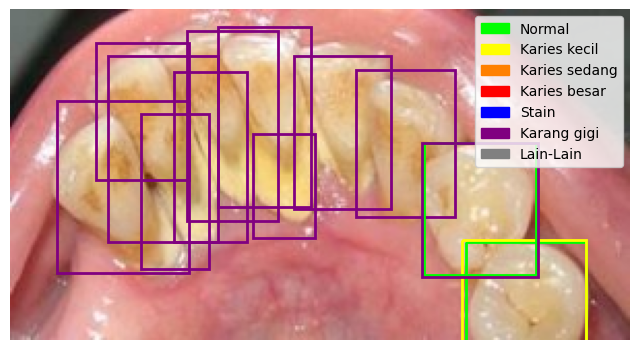

In [12]:
import cv2
import onnx
import time
import torch

from utils.tool import *
from module.detector import Detector
import matplotlib.pyplot as plt

# Path langsung ke file-file yang diperlukan
yaml_path = "configs\\tooth.yaml"  # Ganti dengan path ke file YAML
weight_path = "checkpoint\\weight_AP05_0.450766_230-epoch.pth"  # Ganti dengan path ke file weight
img_path = "karang gigi.jpg"  # Ganti dengan path ke gambar test
threshold = 0.3

# Parsing argumen dihilangkan karena udah ada path langsung

#run on cpu
device = torch.device("cpu")

# Benerin load YAML konfigurasi
cfg = LoadYaml(yaml_path)
print(cfg)

# Model loading
print("load weight from:%s" % weight_path)
model = Detector(cfg.category_num, True).to(device)
model.load_state_dict(torch.load(weight_path, map_location=device))
model.eval()

# Data preprocessing
ori_img = cv2.imread(img_path)
res_img = cv2.resize(ori_img, (cfg.input_width, cfg.input_height), interpolation=cv2.INTER_LINEAR)
img = res_img.reshape(1, cfg.input_height, cfg.input_width, 3)
img = torch.from_numpy(img.transpose(0, 3, 1, 2))
img = img.to(device).float() / 255.0

start = time.perf_counter()
preds = model(img)
end = time.perf_counter()
time = (end - start) * 1000.
print("forward time:%fms" % time)

# Post-processing fitur gambar
output = handle_preds(preds, device, threshold)

# Warna untuk setiap label
colors = [(0.0, 1.0, 0.0), (1.0, 1.0, 0.0), (1.0, 0.5, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.5, 0.0, 0.5), (0.5, 0.5, 0.5)]

LABEL_NAMES = ['Normal', 'Karies kecil', 'Karies sedang', 'Karies besar', 'Stain', 'Karang gigi', 'Lain-Lain']

H, W, _ = ori_img.shape
scale_h, scale_w = H / cfg.input_height, W / cfg.input_width

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB))

# Menampilkan bounding box
for box in output[0]:
    box = box.tolist()

    obj_score = box[4]
    label = int(box[5])

    x1, y1 = int(box[0] * W), int(box[1] * H)
    x2, y2 = int(box[2] * W), int(box[3] * H)

    color = colors[label % len(colors)]

    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=color, linewidth=2)
    ax.add_patch(rect)

# Membuat legenda
legend_labels = {'Normal': 'Normal', 'Karies kecil': 'Karies kecil', 'Karies sedang': 'Karies sedang', 'Karies besar': 'Karies besar', 'Stain': 'Stain', 'Karang gigi': 'Karang gigi', 'Lain-Lain': 'Lain-Lain'}
legend_handles = []
for label, name in legend_labels.items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=colors[LABEL_NAMES.index(label)], label=name))

plt.legend(handles=legend_handles, loc='upper right')
plt.axis('off')
plt.show()


In [31]:
import cv2
import torch
from utils.tool import *
from module.detector import Detector
import matplotlib.pyplot as plt


def process_image(weight_path, img_path, threshold):
    
    import time
    yaml_path = "configs\\tooth.yaml"  # Ganti dengan path ke file YAML

    #run on cpu
    device = torch.device("cpu")

    # Benerin load YAML konfigurasi
    cfg = LoadYaml(yaml_path)

    # Model loading
    model = Detector(cfg.category_num, True).to(device)
    model.load_state_dict(torch.load(weight_path, map_location=device))
    model.eval()

    # Data preprocessing
    ori_img = cv2.imread(img_path)
    res_img = cv2.resize(ori_img, (cfg.input_width, cfg.input_height), interpolation=cv2.INTER_LINEAR)
    img = res_img.reshape(1, cfg.input_height, cfg.input_width, 3)
    img = torch.from_numpy(img.transpose(0, 3, 1, 2))
    img = img.to(device).float() / 255.0

    start = time.perf_counter()
    preds = model(img)
    end = time.perf_counter()
    time = (end - start) * 1000.
    print("forward time:%fms" % time)
    
    # Post-processing fitur gambar
    output = handle_preds(preds, device, threshold)

    # Warna untuk setiap label
    colors = [(0.0, 1.0, 0.0), (1.0, 1.0, 0.0), (1.0, 0.5, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.5, 0.0, 0.5), (0.5, 0.5, 0.5)]

    LABEL_NAMES = ['Normal', 'Karies kecil', 'Karies sedang', 'Karies besar', 'Stain', 'Karang gigi', 'Lain-Lain']

    H, W, _ = ori_img.shape
    scale_h, scale_w = H / cfg.input_height, W / cfg.input_width

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB))

    # Menampilkan bounding box
    for box in output[0]:
        box = box.tolist()

        obj_score = box[4]
        label = int(box[5])

        x1, y1 = int(box[0] * W), int(box[1] * H)
        x2, y2 = int(box[2] * W), int(box[3] * H)

        color = colors[label % len(colors)]

        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)

    # Membuat legenda
    legend_labels = {'Normal': 'Normal', 'Karies kecil': 'Karies kecil', 'Karies sedang': 'Karies sedang', 'Karies besar': 'Karies besar', 'Stain': 'Stain', 'Karang gigi': 'Karang gigi', 'Lain-Lain': 'Lain-Lain'}
    legend_handles = []
    for label, name in legend_labels.items():
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=colors[LABEL_NAMES.index(label)], label=name))

    plt.legend(handles=legend_handles, loc='upper right')
    plt.axis('off')
    plt.show()

Load yaml sucess...
load param...
forward time:43.879300ms


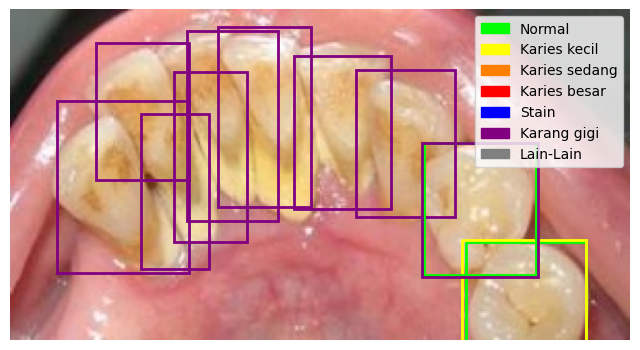

In [32]:
weight_path = "checkpoint\\weight_AP05_0.450766_230-epoch.pth"
img_path = "karang gigi.jpg"
threshold = 0.5
process_image(weight_path, img_path, threshold)

Load yaml sucess...
load param...
forward time:32.764600ms


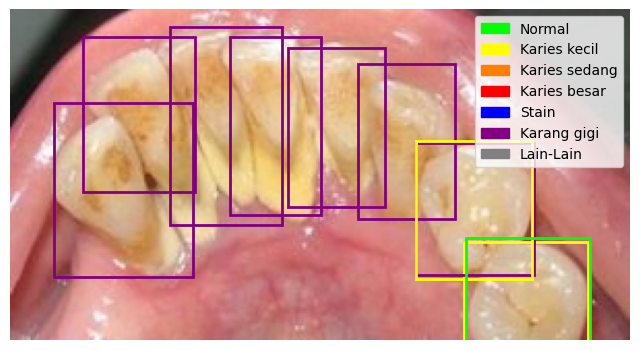

In [33]:
process_image('checkpoint\weight_AP05_0.321379_180-epoch.pth', 'karang gigi.jpg', 0.5)

Load yaml sucess...
load param...


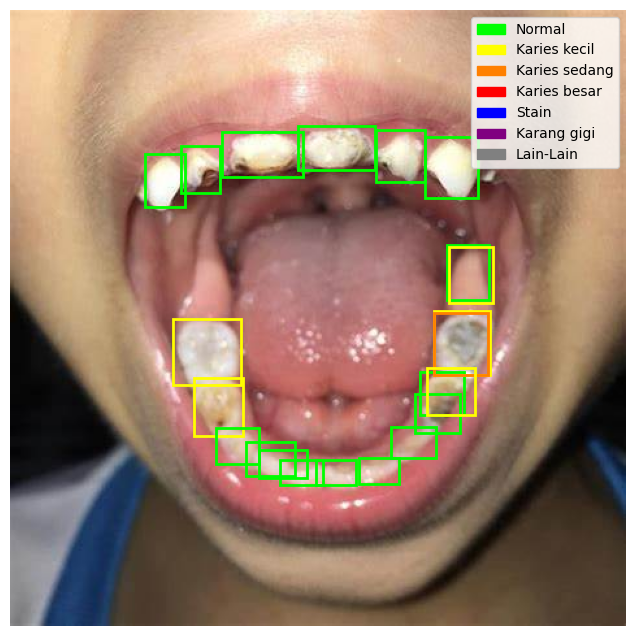

In [21]:
weight_path = "checkpoint\weight_AP05_0.445229_260-epoch.pth"
img_path = "anak.jpg"
threshold = 0.5
process_image(weight_path, img_path, threshold)

Load yaml sucess...
load param...


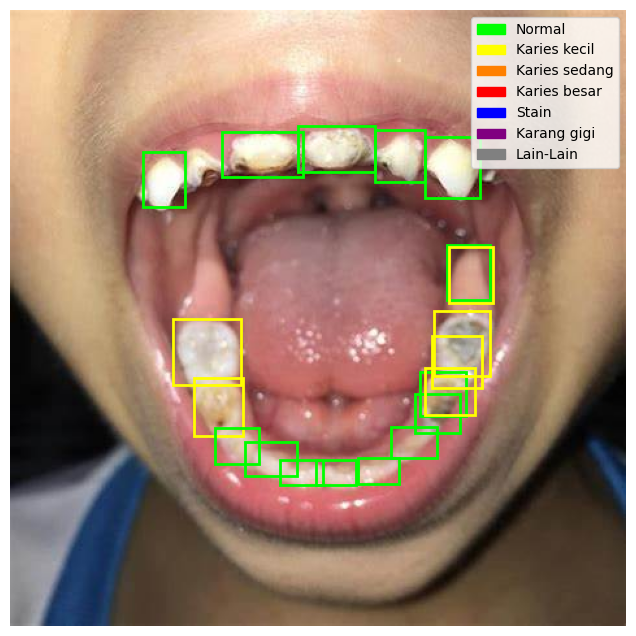

In [23]:
weight_path = "checkpoint\weight_AP05_0.427111_300-epoch.pth"
img_path = "anak.jpg"
threshold = 0.5
process_image(weight_path, img_path, threshold)

Load yaml sucess...
load param...
forward time:37.827800ms


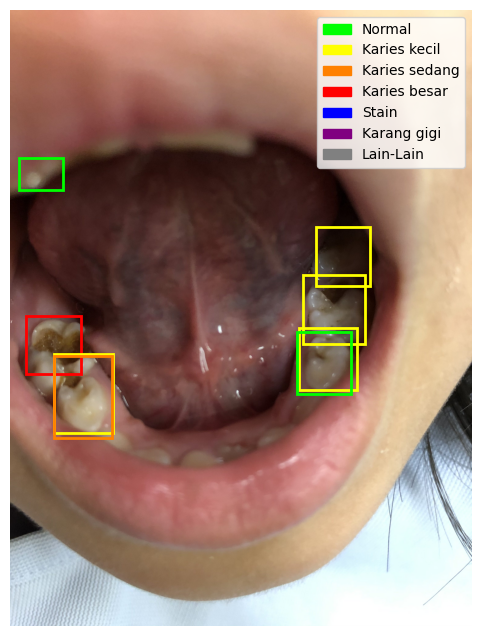

In [34]:
weight_path = "checkpoint\weight_AP05_0.427111_300-epoch.pth"
img_path = "parah.jpg"
threshold = 0.5
process_image(weight_path, img_path, threshold)

In [1]:
!pyhton --version

'pyhton' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!python test.py

run on cpu...
Load yaml sucess...
load weight from:weights\epoch-230.pth
load param...
forward time:22.727900ms


c:\Users\Sayyidan\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
